In [1]:
pip install --user opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as py
%matplotlib inline

In [3]:
img=cv2.imread("fox.jpg")

In [4]:
rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
grey=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [5]:
#scale invariance
sc_iv=cv2.pyrDown(rgb)
sc_iv2=cv2.pyrDown(sc_iv)
num_rows,row_cols=sc_iv2.shape[:2]
print(sc_iv2)

[[[127 134 127]
  [128 135 128]
  [128 135 128]
  ...
  [123 132 127]
  [124 131 127]
  [124 130 126]]

 [[127 134 127]
  [128 135 128]
  [128 135 128]
  ...
  [123 132 127]
  [124 131 127]
  [124 130 126]]

 [[128 135 128]
  [128 135 128]
  [129 136 129]
  ...
  [124 133 128]
  [123 132 127]
  [123 131 126]]

 ...

 [[ 53  79 115]
  [ 54  79 116]
  [ 54  80 117]
  ...
  [ 51  51  58]
  [ 46  49  55]
  [ 44  47  53]]

 [[ 52  76 112]
  [ 52  77 113]
  [ 52  78 115]
  ...
  [ 47  47  55]
  [ 43  45  51]
  [ 40  43  50]]

 [[ 50  74 110]
  [ 51  75 111]
  [ 51  76 113]
  ...
  [ 44  44  52]
  [ 40  42  49]
  [ 37  40  47]]]


In [6]:
cv2.imshow("original",img)
cv2.imshow("first scale",sc_iv)
cv2.imshow("scale",sc_iv2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
#rotational invariance
rot_iv=cv2.getRotationMatrix2D((row_cols/2,num_rows/2,),180,0.5)

In [8]:
#Affine transformation
aff=cv2.warpAffine(sc_iv,rot_iv,(row_cols,num_rows))

In [9]:
#Colour conversion
rot_gray=cv2.cvtColor(aff,cv2.COLOR_RGB2GRAY)

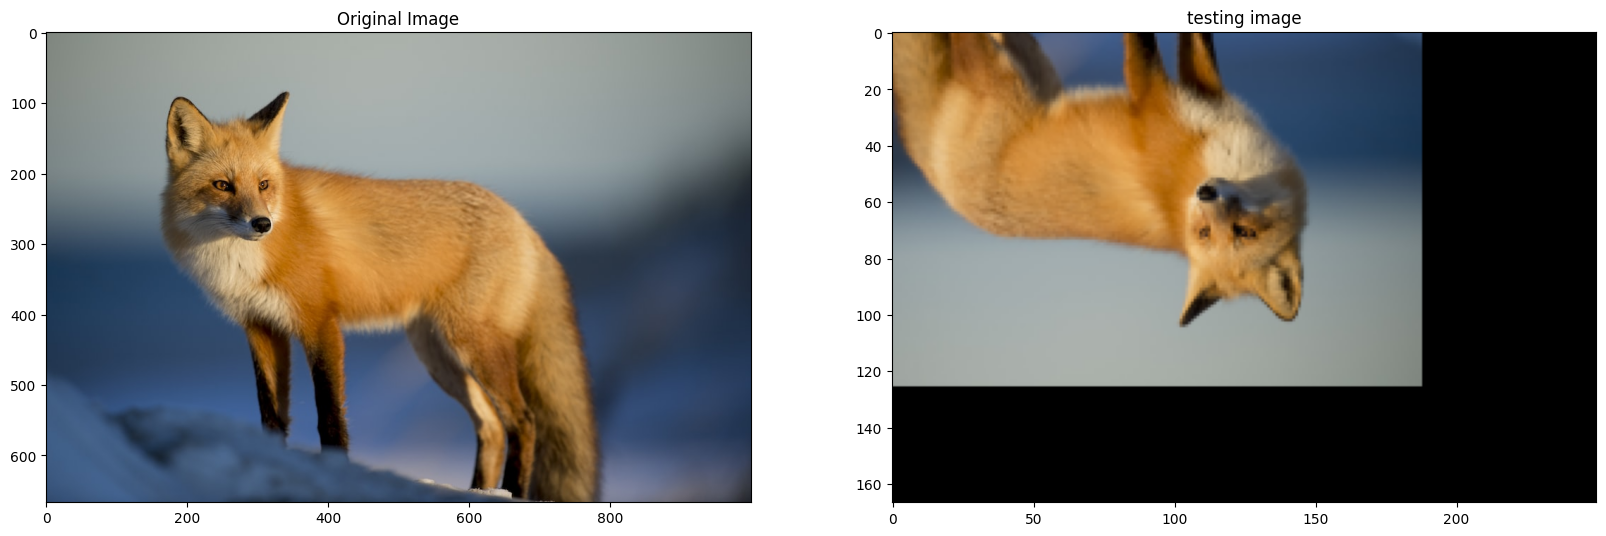

In [10]:
fx,plots=py.subplots(1,2,figsize=(20,10))
plots[0].set_title("Original Image")
plots[0].imshow(rgb)
plots[1].set_title("testing image")
plots[1].imshow(aff)

In [11]:
#SIFT
sift=cv2.xfeatures2d.SIFT_create()

In [12]:
#Detect and Compute
train_kp,train_des=sift.detectAndCompute(grey,None)
test_kp,test_des=sift.detectAndCompute(rot_gray,None)

In [13]:
kp_wo_size=np.copy(rgb)
kp_w_size=np.copy(rgb)

In [14]:
cv2.drawKeypoints(rgb,train_kp,kp_wo_size,color=(0,255,0))
cv2.drawKeypoints(rgb,train_kp,kp_w_size,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

array([[[127, 134, 127],
        [127, 134, 127],
        [127, 134, 127],
        ...,
        [124, 130, 126],
        [124, 130, 126],
        [123, 129, 125]],

       [[127, 134, 127],
        [127, 134, 127],
        [127, 134, 127],
        ...,
        [124, 130, 126],
        [124, 130, 126],
        [123, 129, 125]],

       [[127, 134, 127],
        [127, 134, 127],
        [127, 134, 127],
        ...,
        [124, 130, 126],
        [124, 130, 126],
        [123, 129, 125]],

       ...,

       [[ 50,  74, 110],
        [ 50,  74, 110],
        [ 51,  75, 111],
        ...,
        [ 36,  39,  46],
        [ 36,  39,  46],
        [ 35,  38,  45]],

       [[ 48,  72, 108],
        [ 48,  72, 108],
        [ 48,  72, 108],
        ...,
        [ 34,  37,  44],
        [ 34,  37,  44],
        [ 34,  37,  44]],

       [[ 48,  72, 108],
        [ 48,  72, 108],
        [ 48,  72, 108],
        ...,
        [ 34,  37,  44],
        [ 34,  37,  44],
        [ 34,  37,  44]]

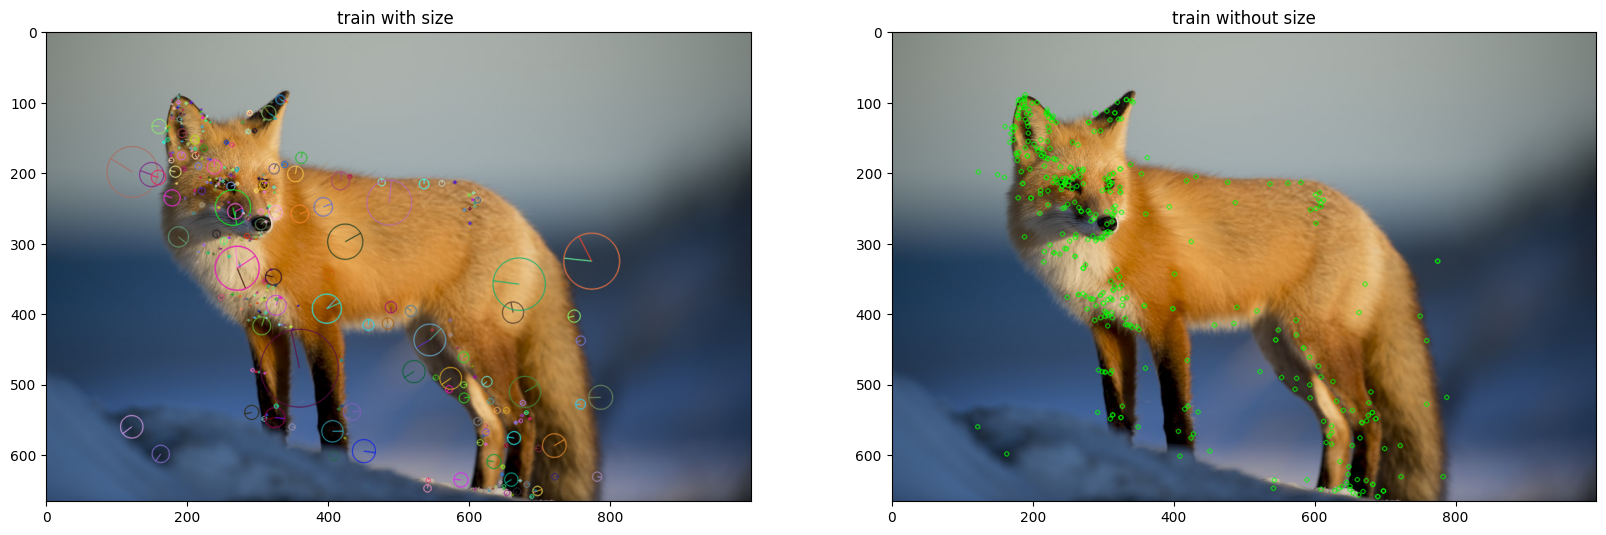

In [15]:
fx,plots=py.subplots(1,2,figsize=(20,10))
plots[0].set_title("train with size ")
plots[0].imshow(kp_w_size,cmap='gray')
plots[1].set_title("train without size")
plots[1].imshow(kp_wo_size,cmap='gray')

In [16]:
#BRUTE FORCE MATCHER
bfm=cv2.BFMatcher(cv2.NORM_L1,crossCheck=False)

In [17]:
#Matching 
match=bfm.match(train_des,test_des)

In [18]:
#Sorting
match=sorted(match,key=lambda x:x.distance)

In [19]:
#Drawing Matches
result=cv2.drawMatches(rgb,train_kp,rot_gray,test_kp,match,rot_gray,flags=2)

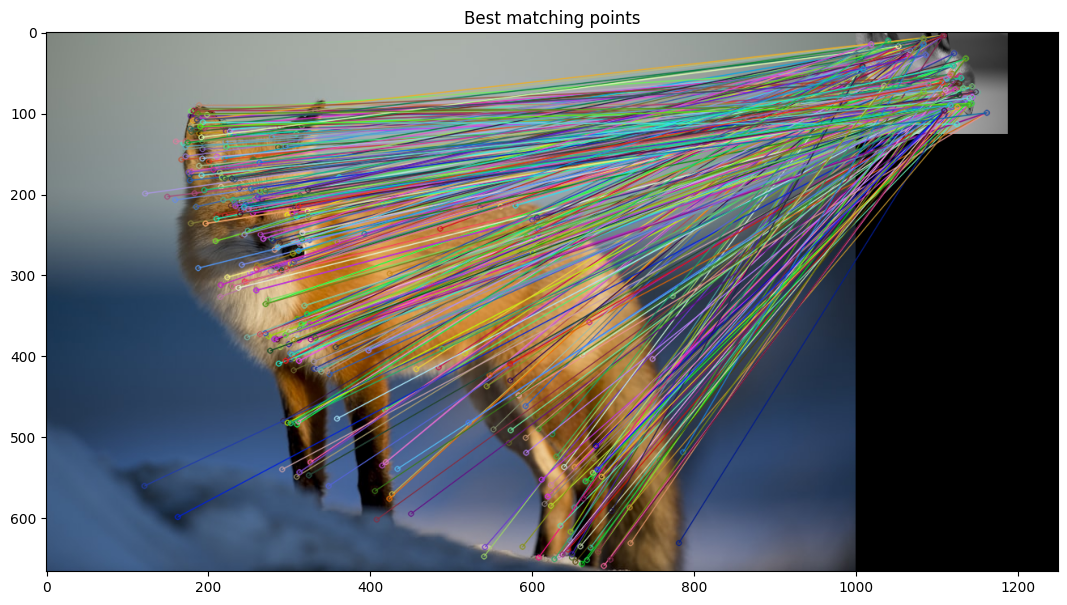

In [20]:
#Matching Displays
py.rcParams['figure.figsize']=[14.0,7.0]
py.title("Best matching points")
py.imshow(result)
py.show()